In [2]:
import sympy as sym
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import time
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [11]:
x = sym.symbols('x')
y = sym.symbols('y')
ex = sym.exp
fxy = 3*(1-x)**2*ex(-x**2-(y+1)**2) - 10*(x/5-x**3-y**5)*ex(-x**2-y**2)-(1/3*ex(-(x+1)**2-y**2))
df_x = sym.lambdify((x,y),sym.diff(fxy,x),'sympy')
df_y = sym.lambdify((x,y),sym.diff(fxy,y),'sympy')

In [3]:
def peak(x,y):
    ex = np.exp
    x,y = np.meshgrid(x,y)
    z = 3*(1-x)**2*ex(-x**2-(y+1)**2) - 10*(x/5-x**3-y**5)*ex(-x**2-y**2)-(1/3*ex(-(x+1)**2-y**2))
    return z

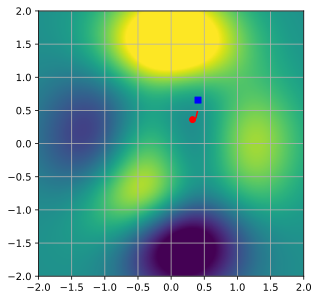

In [226]:
lx = np.linspace(-2,2,201)
ly = np.linspace(-2,2,201)
lz = peak(lx,ly)

local_min = np.random.randn(2) #np.append(np.random.choice(lx,1),np.random.choice(ly,1)[0])
startpnt = local_min[:]

epocs = 50
lr = 0.01
trag = np.zeros((epocs,2))

for i in range(epocs):
  
  gradient = np.array([ df_x(local_min[0],local_min[1]).evalf(), 
                    df_y(local_min[0],local_min[1]).evalf()])
  
  # if not(i%50) and i:
  #     lr = lr/(i/10)
  print(lr)
  lr = lr*(np.abs(gradient))

  local_min = local_min-(lr*gradient)
  trag[i,:] = local_min 

  plt.imshow(lz,extent=[lx[0],lx[-1],ly[0],ly[-1]],vmin=-5,vmax=5,origin='lower')
  plt.grid()
  plt.plot(startpnt[0],startpnt[1],'bs')
  plt.plot(local_min[0],local_min[1],'ro')
  plt.plot(trag[:,0],trag[:,1],'r')
  display.clear_output(wait=True)
  plt.show()


  if np.mean(np.abs(gradient[0])) <= 0.000001:
    print(i,gradient, local_min)
    break

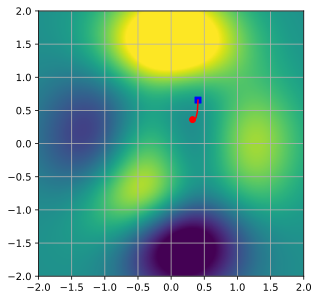

In [227]:
nt = np.concatenate([[startpnt],trag], axis=0)
plt.imshow(lz,extent=[lx[0],lx[-1],ly[0],ly[-1]],vmin=-5,vmax=5,origin='lower')
plt.grid()
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(local_min[0],local_min[1],'ro')
plt.plot(nt[:,0],nt[:,1],'r')
plt.show()